# **Title** #

By: Emma Savu (51050300), Sharon Kim (44152585), Anna Divinagracia (86144250), and Liam Sisson (54274535)

 # **Introduction** #

##### In this project, our goal is to answer the question:

**Which set of two variables is best at accurately predicting a player's played hours using k-nearest neighbours (kNN) regression?**

For some background, in machine learning, regression techniques are widely used to predict numerical outcomes based on one or more input variables. Among these methods, k-nearest neighbors (kNN) regression is a non-parametric approach that predicts the target variable by averaging the values of the k-closest data points in the feature space. kNN regression is valued for its simplicity, effectiveness, and ability to capture nonlinear relationships without assuming a specific model structure.

In this project, we applied kNN regression to explore how well different pairs of variables can predict a player's total hours played in a gaming dataset. The goal was to determine which combination of two variables provides the most accurate predictions of hours played, enabling more informed decision-making or targeted interventions in gaming analytics.

To answer our question, we combined the `sessions.csv` and the `players.csv` datasets, which contain information about individual players in an unspecified gaming context. The datasets include multiple features we can use, such as age, skill level, gender, played hours, time of day played, and start and end times. These variables potentially influence a player’s overall engagement, measured as hours played. By selecting specific pairs of these features, we sought to identify which combinations provide the strongest predictive power for hours played. We will convert the categorical variables to numerical numbers to analyze our model.

This analysis highlights the strengths and limitations of kNN regression and emphasizes the importance of feature selection in predictive modelling. Ultimately, the results can inform how we interpret player behaviour and optimize predictions in similar datasets.

The variables in the `players` dataset containing 196 observations can be described as follows:

- `experience`: character variable indicating player skill level/experience
- `subscribe`: logical variable (binary) for email subscription status
- `hashedEmail`: character variable, unique player identifier
- `played_hours`: double precision, hours played to the tenth decimal
- `name`: character variable for player's name
- `gender`: character variable with 7 unique gender categories
- `age`: double precision for player’s age in years
- `individualId`: logical variable for player ID
- `organizationName`: logical variable for player's organization

Furthermore, the variables in the `sessions` dataset containing 1535 observations can be described as:

- `hashedEmail`: character variable, unique player identifier
- `start_time`: character variable for start date in DD/MM/YYYY and start time in 00:00 of the player's game session
- `end_time`: character variable for end date in DD/MM/YYYY and end time in 00:00 of the player's game session
- `original_start_time`: double data type for start time in UNIX timestamp format of the player's game session
- `original_end_time`: double data type for end time in UNIX timestamp format of the player's game session

# **Methods** #

In [2]:
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 6)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
#load in players data table
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players <- read_csv(url)
head(players)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


In [4]:
#load in sessions data table
url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions <- read_csv(url) 
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [5]:
#Combine data tables
combined <- merge(sessions, players, by = "hashedEmail")
head(combined)

,hashedEmail,start_time,end_time,original_start_time,original_end_time,experience,subscribe,played_hours,name,gender,age,individualId,organizationName
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
1,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,23/05/2024 00:22,23/05/2024 01:07,1.71642e+12,1.71643e+12,Regular,TRUE,1.5,Isaac,Male,20,NA,NA
2,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,22/05/2024 23:12,23/05/2024 00:13,1.71642e+12,1.71642e+12,Regular,TRUE,1.5,Isaac,Male,20,NA,NA
3,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,28/06/2024 04:28,28/06/2024 04:58,1.71955e+12,1.71955e+12,Pro,FALSE,0.4,Lyra,Male,21,NA,NA
4,0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,19/09/2024 21:01,19/09/2024 21:12,1.72678e+12,1.72678e+12,Beginner,TRUE,0.1,Osiris,Male,17,NA,NA
5,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,31/08/2024 22:44,31/08/2024 23:20,1.72514e+12,1.72515e+12,Regular,TRUE,5.6,Winslow,Male,17,NA,NA
6,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,01/09/2024 21:59,01/09/2024 22:36,1.72523e+12,1.72523e+12,Regular,TRUE,5.6,Winslow,Male,17,NA,NA


In [6]:
combined_modified <- combined|>
    #mutate(experience = as_factor(experience)) |> #Convert experience and gender to factors for easier plotting and modeling
    #mutate(gender = as_factor(gender))|> 
    select( -individualId, -organizationName, -name, -hashedEmail) # remove variables with null values or unwanted coloumns

In [7]:
#creating training and testing split 
split <- initial_split(combined_modified, prop= 0.75, strata= played_hours)
combined_training <- training(split)
combined_testing <- testing(split)
head(combined_testing)

,start_time,end_time,original_start_time,original_end_time,experience,subscribe,played_hours,gender,age
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<dbl>
1,23/05/2024 00:22,23/05/2024 01:07,1.71642e+12,1.71643e+12,Regular,TRUE,1.5,Male,20
2,30/08/2024 16:18,30/08/2024 16:38,1.72503e+12,1.72504e+12,Regular,TRUE,5.6,Male,17
3,31/08/2024 02:29,31/08/2024 03:12,1.72507e+12,1.72507e+12,Regular,TRUE,5.6,Male,17
4,07/07/2024 00:08,07/07/2024 00:24,1.72031e+12,1.72031e+12,Amateur,TRUE,17.2,Male,14
5,24/06/2024 05:04,24/06/2024 05:08,1.71921e+12,1.71921e+12,Amateur,TRUE,17.2,Male,14
6,01/06/2024 18:28,01/06/2024 18:37,1.71727e+12,1.71727e+12,Amateur,TRUE,17.2,Male,14


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


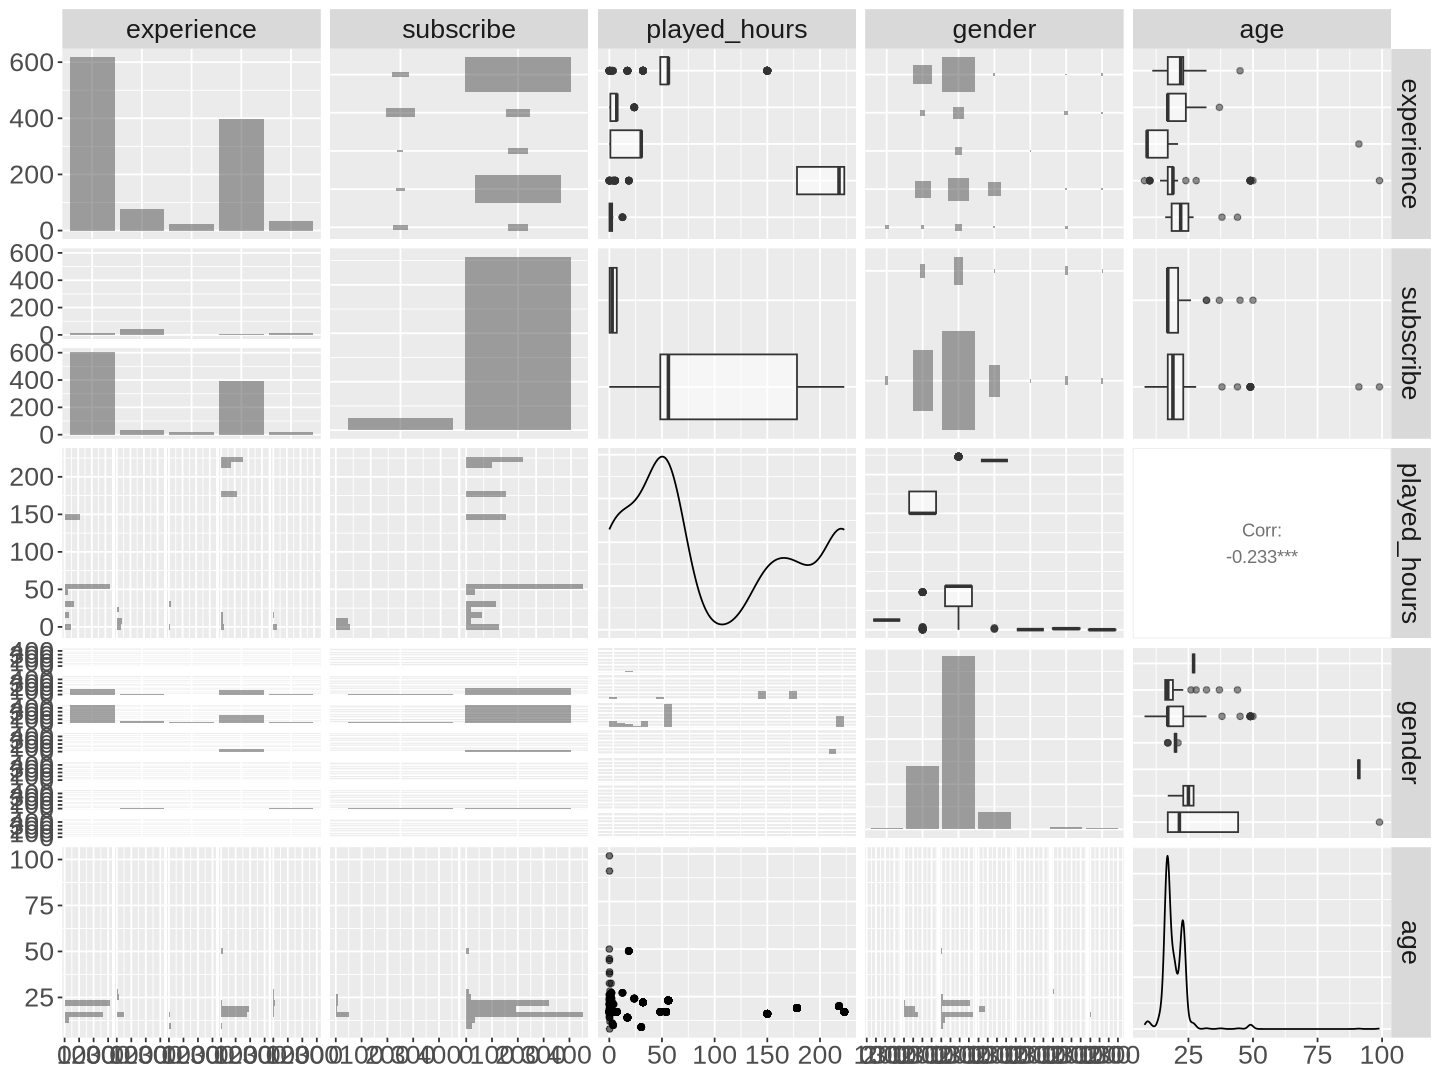

In [21]:
options(repr.plot.width = 12, repr.plot.height = 9)

combined_fct <- combined_training |> #changing some variable types to factors
    mutate(experience = as.factor(experience),
           gender = as.factor(gender),
           subscribe = as.factor(subscribe))

combined_pairs <- combined_fct |> 
    select(experience:age) |>
    ggpairs(aes(alpha = 0.2)) +
    theme(text = element_text(size = 20))

combined_pairs

# **Results** ##

# **Discussion** #

# **References** #